In [ ]:
import pandas as pd



# this only pulls the first 1000 rows. if you want the whole dataset take out the nrows = 1000
data=pd.read_csv('311_Service_Requests_from_2010_to_Present.tsv',delimiter='\t',encoding='utf-8-sig',low_memory=False, index_col  = 'Unique Key')
#we will use sample() function to select a random sample of size equivalent to 15% of the size of the dataset
df1 = data.sample(frac =.15, replace=True)

#print(list(df.columns.values)) #file header
df.tail(1) #last N rows


In [ ]:
df2 = df1.copy()
df2.to_csv(r'C:\Users\faris\311_sample.csv')

In [2]:
import pandas as pd
df = pd.read_csv('311_sample.csv')

/opt/tljh/user/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (8,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.shape

(382355, 41)

In [4]:
#df['just_date'] = df['Created Date'].dt.date
df['just_time'] = pd.to_datetime(df['Created Date']).dt.strftime('%H:%M:%S')
df['just_close'] = pd.to_datetime(df['Closed Date'])
df['just_open'] = pd.to_datetime(df['Created Date'])
df['day of the week Open'] =  df['just_open'].dt.day_name()
df['day of the week close'] =  df['just_close'].dt.day_name()
df.dtypes
#df.tail(10)

Unique Key                                 int64
Created Date                              object
Closed Date                               object
Agency                                    object
Agency Name                               object
Complaint Type                            object
Descriptor                                object
Location Type                             object
Incident Zip                              object
Incident Address                          object
Street Name                               object
Cross Street 1                            object
Cross Street 2                            object
Intersection Street 1                     object
Intersection Street 2                     object
Address Type                              object
City                                      object
Landmark                                  object
Facility Type                             object
Status                                    object
Due Date            

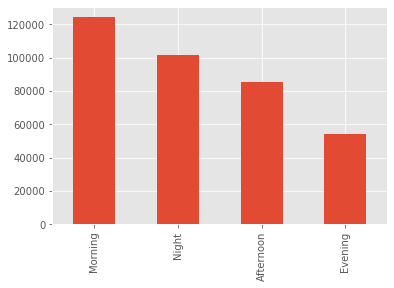

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

#part of day for calling and making a 311 requst
df_close = df['just_close']
#print (df)
#
df_close_cut=pd.cut(df_close.dt.hour,
               [0,6,12,18,23],
               labels=['Night','Morning','Afternoon','Evening'],
               include_lowest=True)
#
df['Part of day close'] =  df_open_cut
df_close_cut.value_counts().plot.bar()

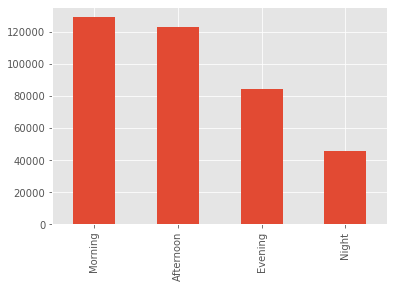

In [24]:
#part of day for calling and making a 311 requst
df_open = df['just_open']
#print (df)
#
df_open_cut=pd.cut(df_open.dt.hour,
               [0,6,12,18,23],
               labels=['Night','Morning','Afternoon','Evening'],
               include_lowest=True)
#
df['Part of day open'] =  df_open_cut
df_open_cut.value_counts().plot.bar()

In [25]:
df_open_cut.value_counts()

Morning      129200
Afternoon    122913
Evening       84742
Night         45500
Name: just_open, dtype: int64

In [29]:
df_close_cut.value_counts()

Morning      124286
Night        101482
Afternoon     85749
Evening       54278
Name: just_close, dtype: int64

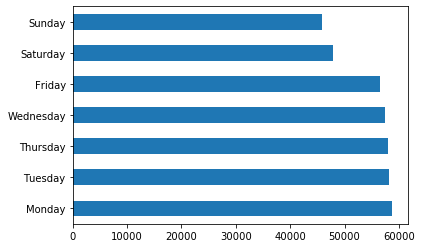

In [6]:
df['day of the week Open'].value_counts().plot.barh()


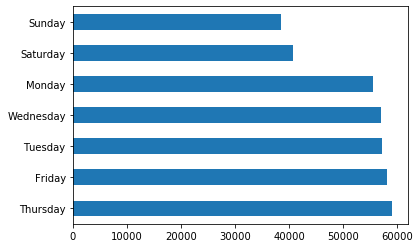

In [7]:
df['day of the week close'].value_counts().plot.barh()

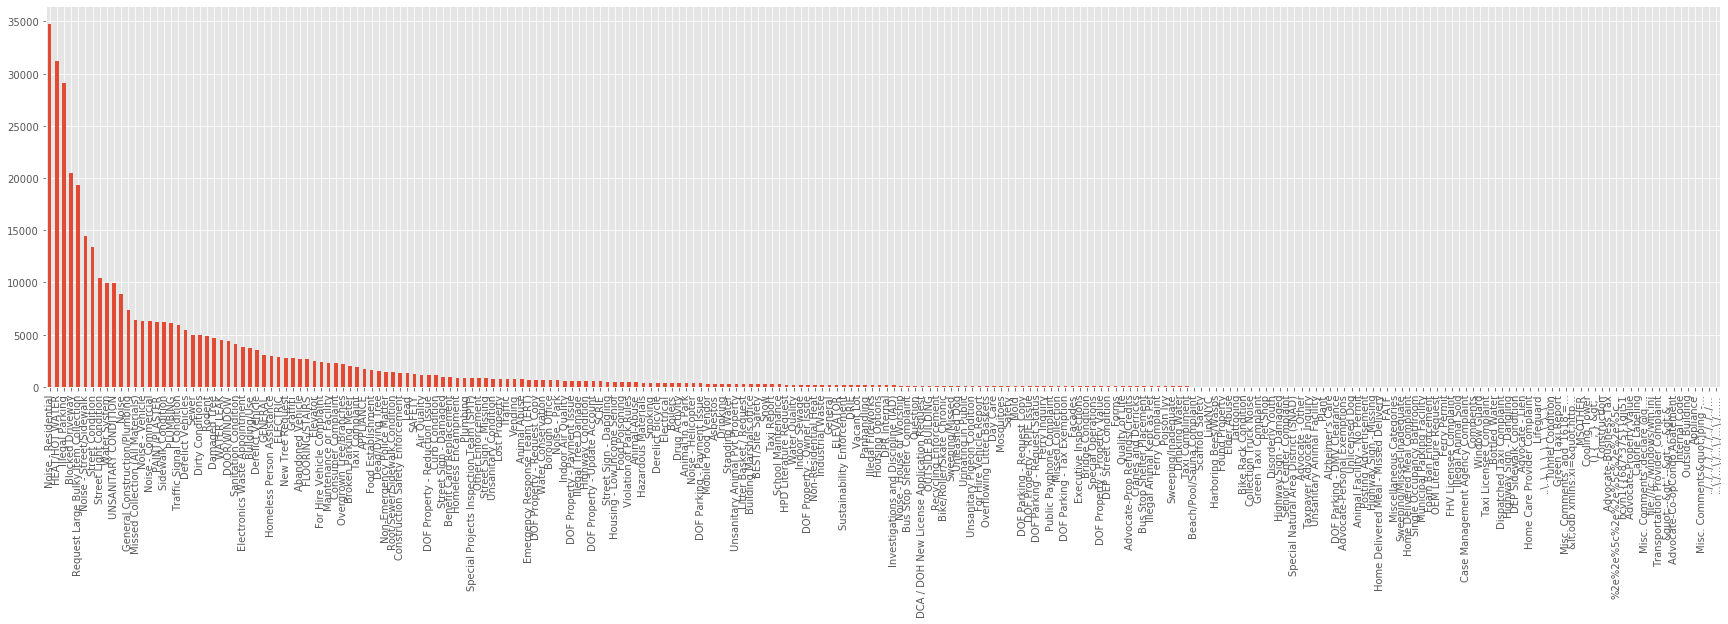

In [38]:
Count = pd.value_counts(df['Complaint Type'].values, sort=True)


Count.plot.bar( figsize=(30,7), rot = 90)

In [5]:
df['Days to Close a Complaint' ] = -(df["just_open"] - df["just_close"]).astype("timedelta64[D]")
df['Days to Close a Complaint' ].describe()

count    365795.000000
mean          8.437513
std          21.194896
min         -54.000000
25%           1.000000
50%           1.000000
75%           5.000000
max         370.000000
Name: Days to Close a Complaint, dtype: float64

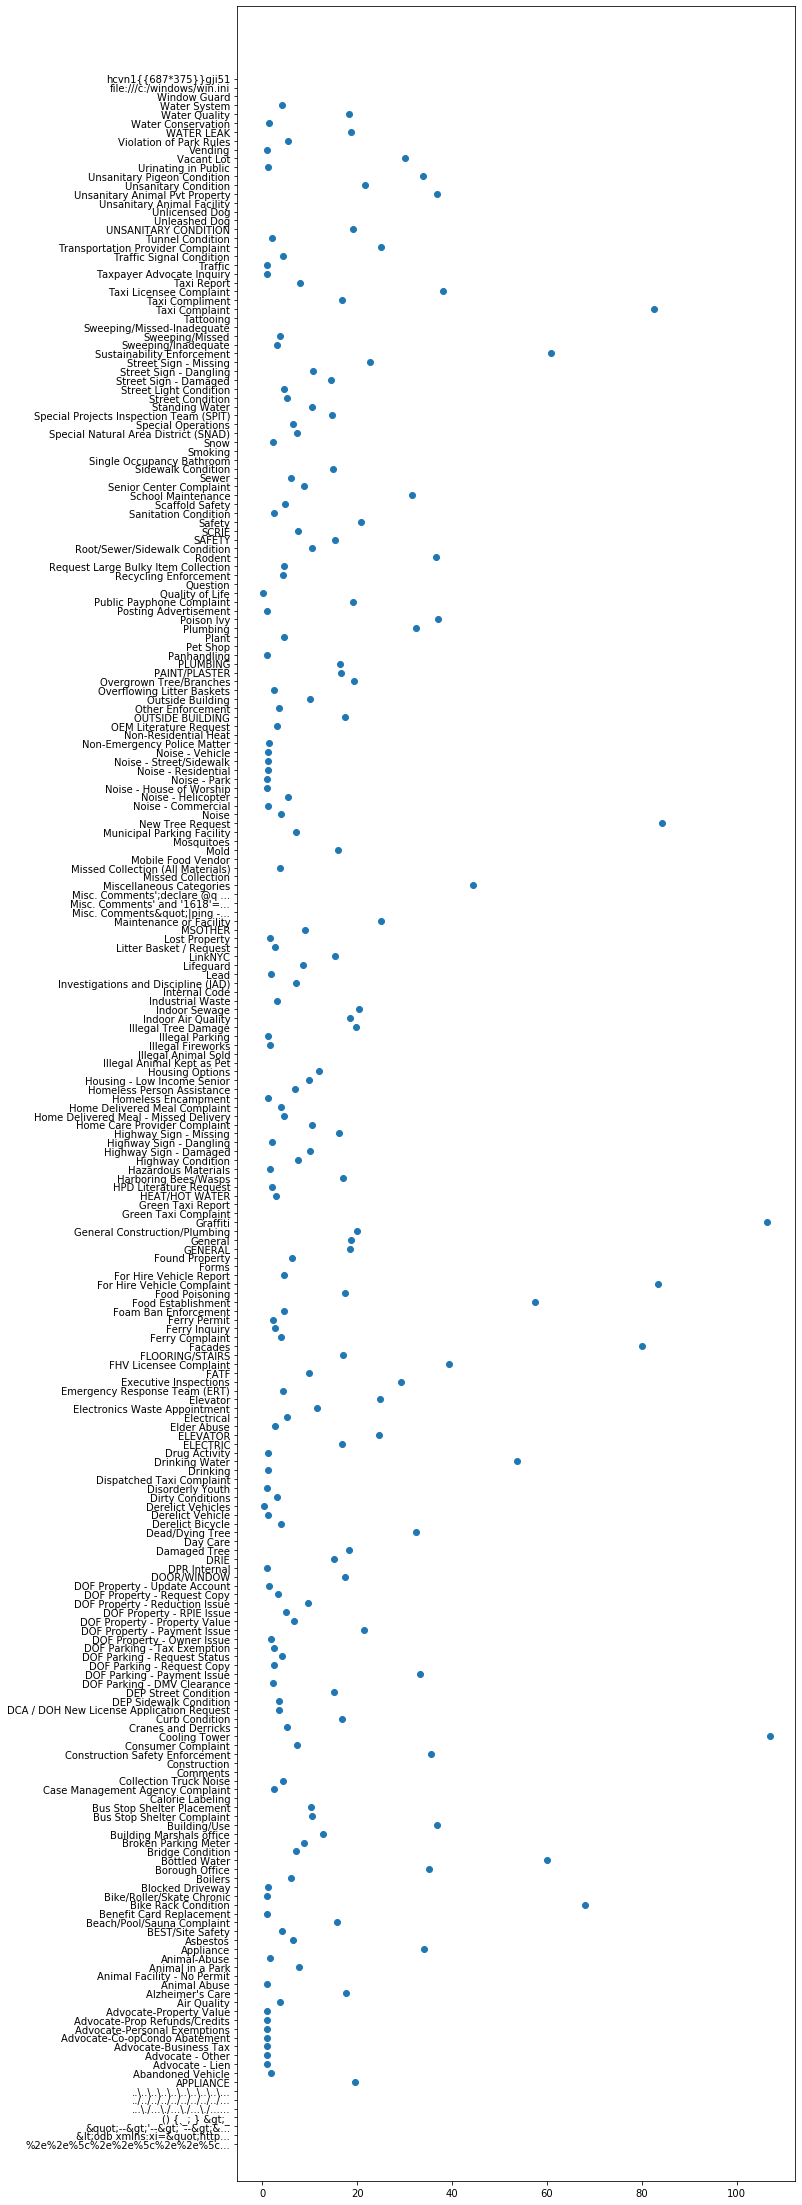

In [11]:
import matplotlib.pyplot as plt

bill_vs_size = df['Days to Close a Complaint' ].groupby(df['Complaint Type' ]).mean()
plt.figure(figsize=(10, 40))
plt.scatter(bill_vs_size, bill_vs_size.index)

